# Titanic Survival Prediction

## Problem Statement
- Titanic Survival Prediction is a classic data science project based on the Titanic
dataset, which contains information about passengers who were on board the
Titanic, including whether they survived or not. 
- The goal is to build a predictive
model that can predict whether a passenger would have survived the Titanic
disaster based on features like age, gender, ticket class, and more.


- This project involves 
- data preprocessing, 
- exploratory data analysis(EDA), 
- feature engineering,
- machine learning and algorithms like
- logistic regression, 
- decision trees

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_rows' , 500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr',False)

# Read the Dataset

In [4]:
#Input the data
df = pd.read_csv("tested.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


Print number of columns and rows of dataset

In [6]:
#display number of columns and rows from dataset

df.shape

(418, 12)

Print few rows of dataset

In [7]:
#display few rows of the dataset using head()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Print non-null count and data types of columns

In [8]:
#Display non-null count and data types of columns using info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Print statistical information of the dataset

In [9]:
#Display statistical information of the dataset using describe()

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Check null count of columns from the df

In [10]:
#Print total null values from the columns 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Get null percentage 

In [11]:
#Calculate null percentage

null_percent = df.isnull().sum()/len(df)*100
null_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

# Drop the columns with more than 40% null values

In [12]:
#Drop the Cabin column using drop() function

df.drop(["Cabin"] , axis = 1 , inplace = True)

In [13]:
#chech whether the column has dropped or not

df.shape

(418, 11)

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object')

# Handling Missing Values

In [15]:
df.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [16]:
# check nulls
df.Age.isnull().sum()

86

In [17]:
# Calculate mean
Age_m = df.Age.mean()
Age_m

30.272590361445783

In [18]:
# fill age with mean
df.Age= df.Age.fillna(Age_m)

In [19]:
# check null count after filling
df.Age.isnull().sum()

0

## Univariate Analysis 

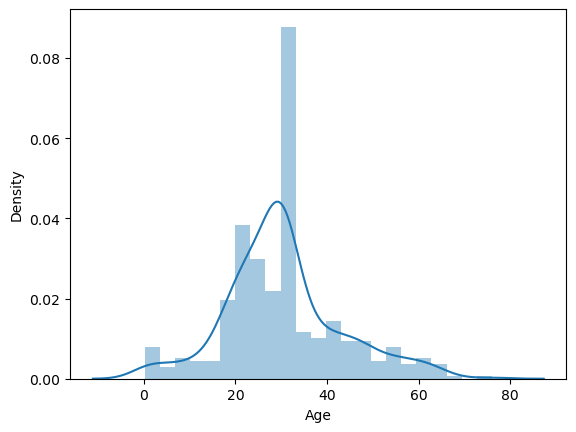

In [20]:
# Plot distplot of age to see distribution of data
sns.distplot(df.Age)
plt.show()

# Fare 

In [21]:
#Check null count
df.Fare.isnull().sum()

1

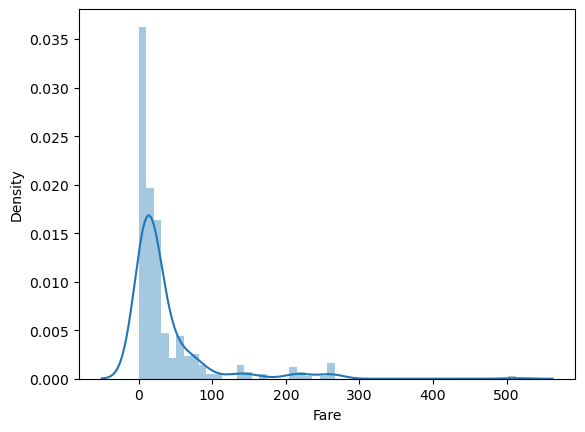

In [22]:
#plot distplot to see the skewness of data in fare column
sns.distplot(df.Fare)
plt.show()

here Right skew is appeared so we will fill the null value with mean

In [23]:
#Calculate the mean value of Fare
Fare_mean = df.Fare.mean()
Fare_mean

35.627188489208635

In [24]:
#Fill the null value of Fare with mean of it

df.Fare = df.Fare.fillna(Fare_mean)

In [25]:
#Check whether the null value has filled or not
df.Fare.isnull().sum()

0

# Detection and handling of Outliers in Dataset

Separate the numerical and Categorical columns from Dataset

In [26]:
#List the numerical columns from the dataframe
num_cols = df.select_dtypes(include = ["number"]).columns.tolist()
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [27]:
#List the categorical columns from the dataframe
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols

['Name', 'Sex', 'Ticket', 'Embarked']

# Check outliers from numerical columns of the dataframe

In [28]:
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

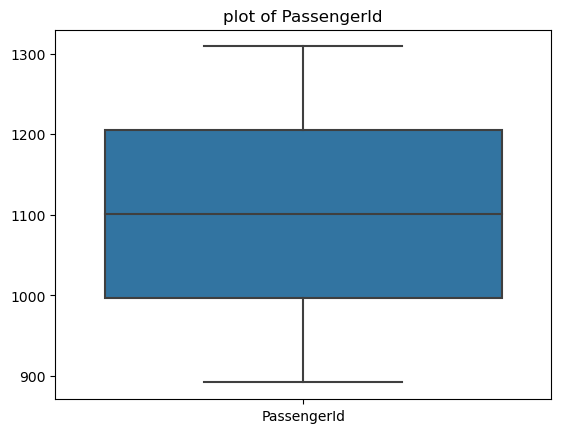

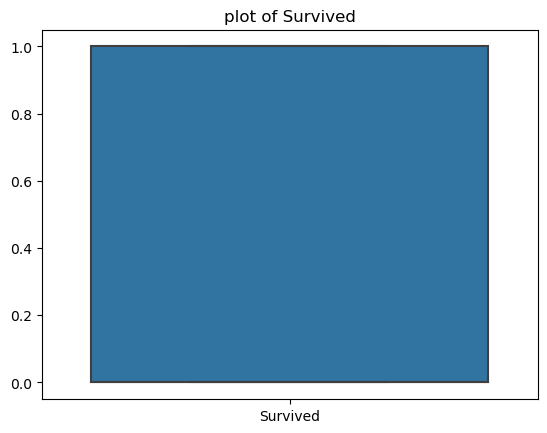

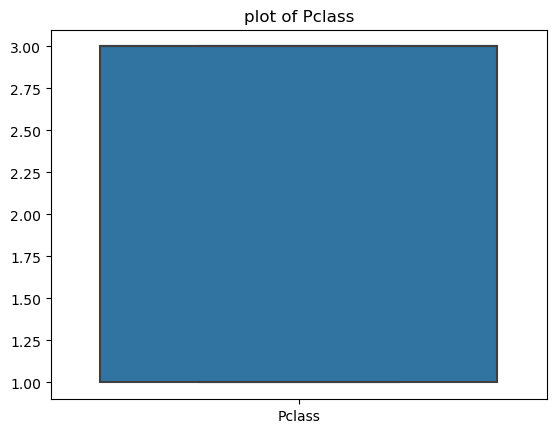

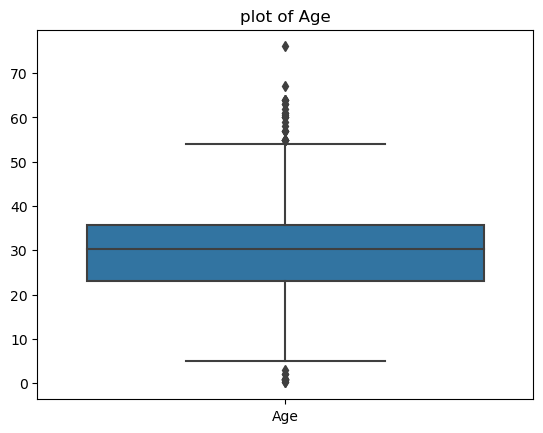

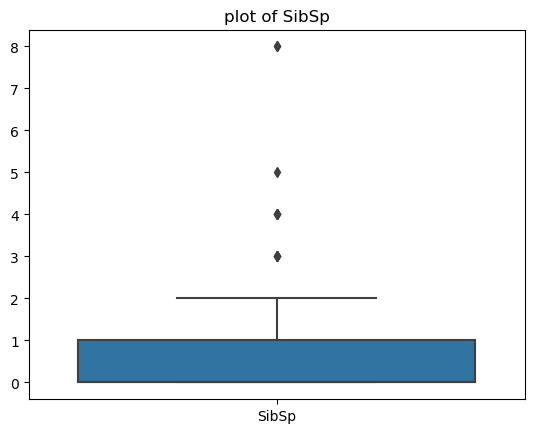

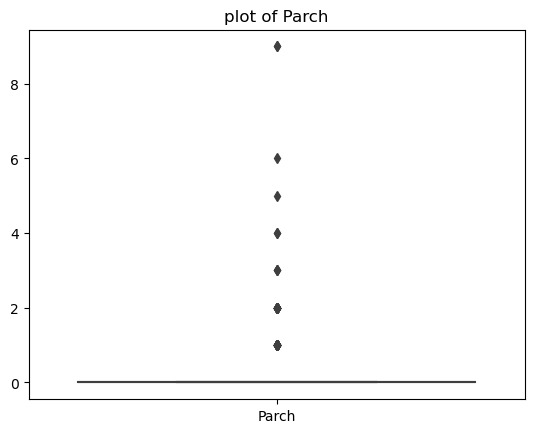

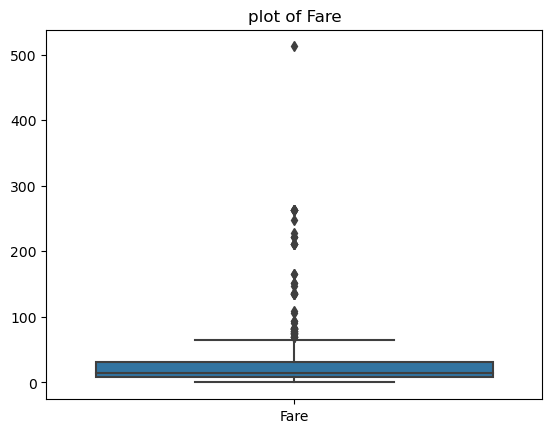

In [29]:
# plot boxplot to detect the outliers presence
for i in num_cols:
    sns.boxplot(df[[i]])
    plt.title("plot of "+ i)
    plt.show()

In [30]:
# get value count of SibSp
df.SibSp.value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [31]:
# get value count of Parch
df.Parch.value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

# Check data imbalance by analysing the SURVIVED variable

In [32]:
#Display the value count of Survived variable
df.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

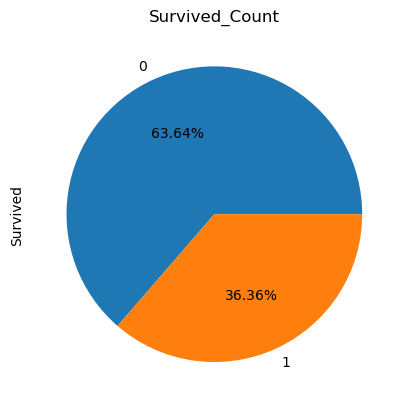

In [33]:
#Plot pie chart of Survived variable
df.Survived.value_counts(normalize = True).plot.pie(autopct = "%1.2f%%")
plt.title("Survived_Count")
plt.show()

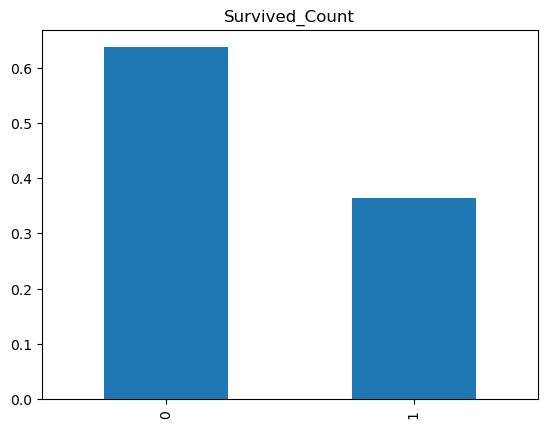

In [34]:
# plot bar chart of survived count
df.Survived.value_counts(normalize = True).plot.bar()
plt.title("Survived_Count")
plt.show()

# Sex/Gender

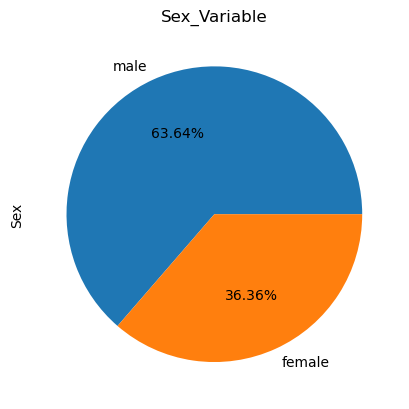

In [35]:
# plot pie chart of gender data
df.Sex.value_counts(normalize = True).plot.pie(autopct = "%1.2f%%")
plt.title("Sex_Variable")
plt.show()

## Bivariate Analysis

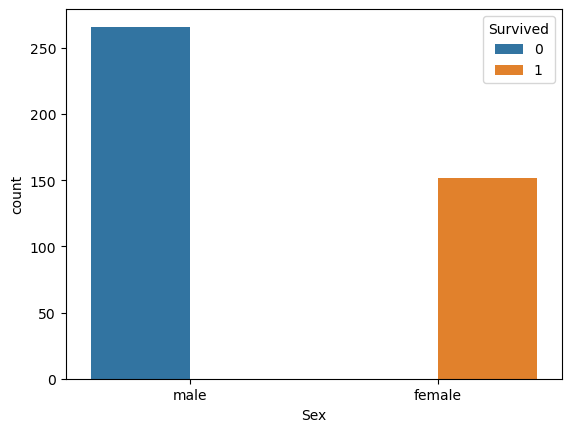

In [40]:
#Plot countplot of Sex Variable with respect to Survived variable

sns.countplot(data=df, x="Sex", hue="Survived")
plt.show()

In [41]:
#See the count of male and female survived or not

df.groupby(['Sex' , 'Survived'])['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

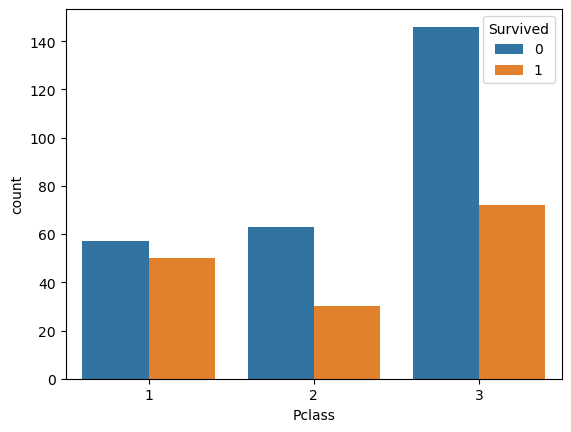

In [42]:
#Plot countplot of pClass variable with respect to Survived variable

sns.countplot(df, x="Pclass", hue="Survived")
plt.show()

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Making Buckets From Age Column

In [44]:
# create age buckets of age variable using pd.cut()
pd.cut(df.Age[:5],[0,20,40,60,80] , labels= ["<20" , "20-40" , "40-60" ,"60-80"])

0    20-40
1    40-60
2    60-80
3    20-40
4    20-40
Name: Age, dtype: category
Categories (4, object): ['<20' < '20-40' < '40-60' < '60-80']

In [46]:
# make new column containing age buckets
df["age_group"] = pd.cut(df.Age[:5],[0,20,40,60,80] , labels= ["<20" , "20-40" , "40-60" ,"60-80"])
df.age_group.value_counts()

20-40    3
40-60    1
60-80    1
<20      0
Name: age_group, dtype: int64

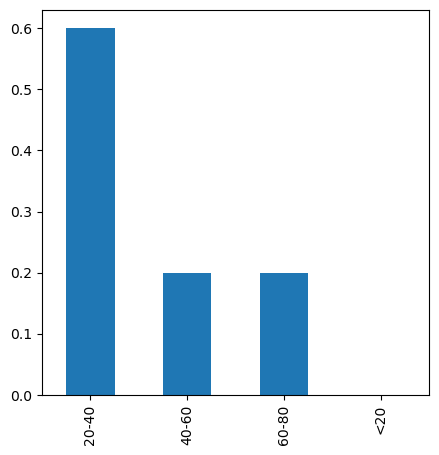

In [59]:
# Plot bar chart of age_group
plt.figure(figsize = [5,5])
df.age_group.value_counts(normalize = True).plot.bar()
plt.show()

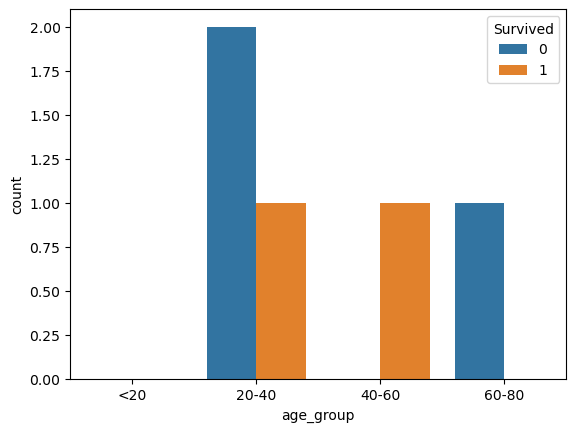

In [48]:
# plot countplot of age_group with respect to survived
sns.countplot(df , x = "age_group" , hue= "Survived")
plt.show()

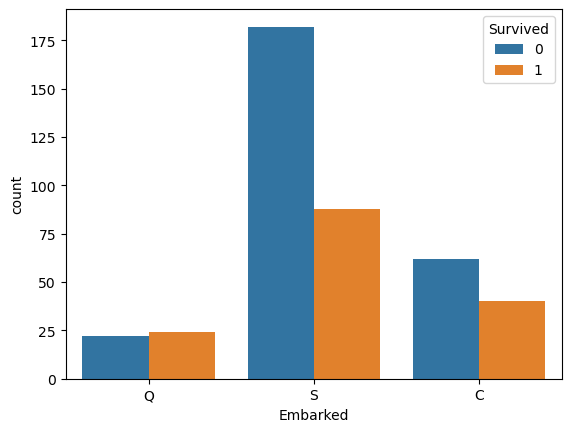

In [49]:
# plot countplot of embarked with respect to survived
sns.countplot(df , x = "Embarked" , hue = "Survived")
plt.show()

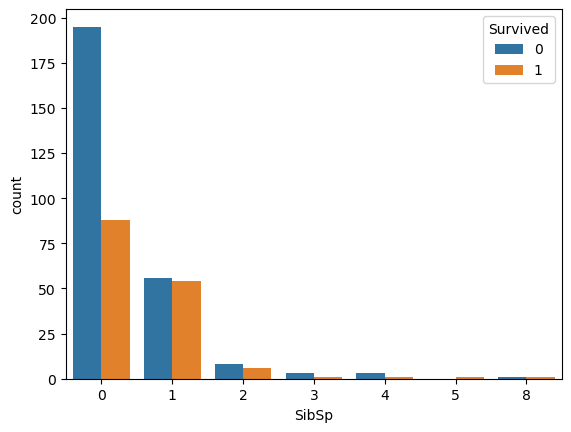

In [50]:
# plot countplot of Sibsp with respect to Survived
sns.countplot(df , x= "SibSp" , hue = "Survived")
plt.show()

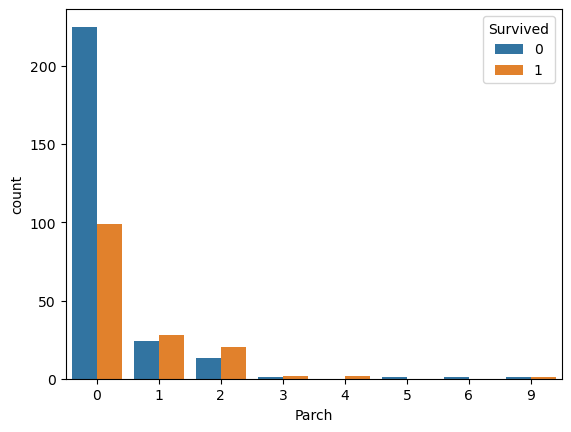

In [51]:
# plot countplot of Parch with respect to survived
sns.countplot(df, x = "Parch" , hue="Survived")
plt.show()

## Multivariate analysis

In [60]:
# see correlation
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,0.023245,-0.030874,0.003818,0.043080,0.008209,-0.001026
Survived,-0.023245,1.000000,-0.108615,-1.000000,-0.000011,0.099943,0.159120,0.191382,-0.037432
Pclass,-0.026751,-0.108615,1.000000,0.108615,-0.440782,0.001087,0.018721,-0.576619,-0.372344
Sex,0.023245,-1.000000,0.108615,1.000000,0.000011,-0.099943,-0.159120,-0.191382,0.037432
Age,-0.030874,-0.000011,-0.440782,0.000011,1.000000,-0.079535,-0.045073,0.326800,0.126594
SibSp,0.003818,0.099943,0.001087,-0.099943,-0.079535,1.000000,0.306895,0.171488,0.041221
Parch,0.043080,0.159120,0.018721,-0.159120,-0.045073,0.306895,1.000000,0.230001,0.067474
Fare,0.008209,0.191382,-0.576619,-0.191382,0.326800,0.171488,0.230001,1.000000,0.315129
Embarked,-0.001026,-0.037432,-0.372344,0.037432,0.126594,0.041221,0.067474,0.315129,1.000000


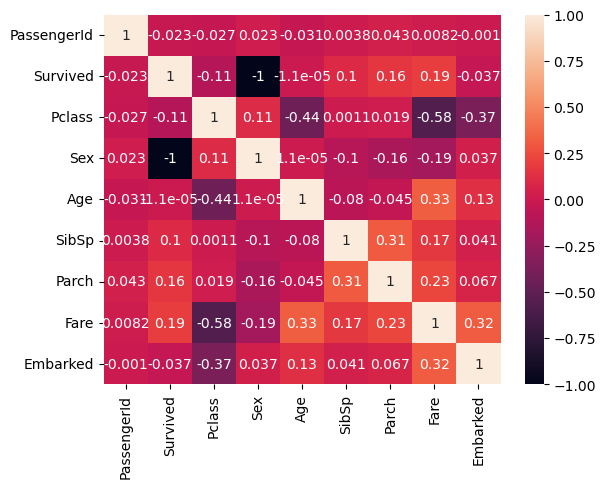

In [63]:
# plot heatmap to visualize correlation
sns.heatmap(df.corr() , annot = True)
plt.show()

## Machine Learning

### Logistics Regression 
#### Steps

- create x and y
- create train and test sets (70 -30 , 80-20)
- Train your model on the training set(i.e.,learn the coefficients)
- Evaluate the model(training set , test set)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,20-40
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,40-60
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,60-80
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,20-40
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,20-40


In [53]:
# convert the categorical column sex into numerical 
df['Sex'].replace(['female', 'male'], [0, 1], inplace=True)

In [54]:
# convert the categorical column Embarked into numerical
df["Embarked"].replace(["Q" , "S" , "C"] , [0,1,2] , inplace = True)

In [55]:
#create x and y
X= df[["Age" , "Sex" , "Pclass" ,"SibSp" , "Embarked"]].values
y = df[["Survived"]].values

In [56]:
#train-test split
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.67 , test_size = 0.33 , random_state = 100)

### Logistic Regression 

In [57]:
# Calculate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
Y_pred = logreg.predict(X_test)
log_score = round(logreg.score(X_train,y_train)*100,2)
log_score

100.0

# Decision Tree 

In [58]:
# Calculate Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score

100.0